Got 100857/112896 with acc 89.34
Dice score: 0.0


100%|██████████| 10/10 [00:05<00:00,  1.89it/s, loss=-3.67]


y torch.Size([1, 112, 112])
preds torch.Size([1, 1, 112, 112])
y torch.Size([1, 112, 112])
preds torch.Size([1, 1, 112, 112])
y torch.Size([1, 112, 112])
preds torch.Size([1, 1, 112, 112])
y torch.Size([1, 112, 112])
preds torch.Size([1, 1, 112, 112])
y torch.Size([1, 112, 112])
preds torch.Size([1, 1, 112, 112])
y torch.Size([1, 112, 112])
preds torch.Size([1, 1, 112, 112])
y torch.Size([1, 112, 112])
preds torch.Size([1, 1, 112, 112])
y torch.Size([1, 112, 112])
preds torch.Size([1, 1, 112, 112])
y torch.Size([1, 112, 112])
preds torch.Size([1, 1, 112, 112])


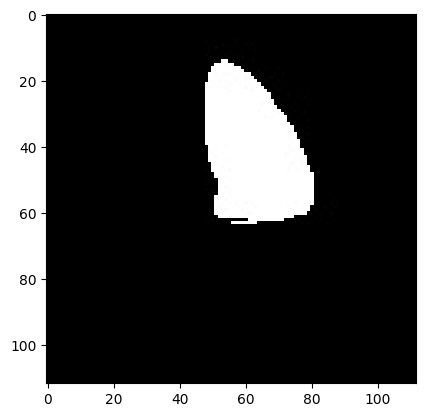

In [1]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from model import UNET

import matplotlib.pyplot as plt


import torchvision

from utils import (


    load_checkpoint,
    save_checkpoint,
    get_loaders,
    check_accuracy,
    save_predictions_as_imgs,
)

# Hyperparameters etc.
LEARNING_RATE = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 1
NUM_EPOCHS = 1
NUM_WORKERS = 8
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112 
PIN_MEMORY = True
LOAD_MODEL = False
TRAIN_IMG_DIR = "../data/train_images/"
TRAIN_MASK_DIR = "../data/train_masks/"
VAL_IMG_DIR = "../data/val_images/"
VAL_MASK_DIR = "../data/val_masks/"

def train_fn(loader, model, optimizer, loss_fn, scaler):
    loop = tqdm(loader)

    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=DEVICE)
        targets = targets.float().unsqueeze(1).to(device=DEVICE)

        # forward
        with torch.cuda.amp.autocast():
            predictions = model(data)
            loss = loss_fn(predictions, targets)

        # backward
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # update tqdm loop
        loop.set_postfix(loss=loss.item())

        # path_prueba = f"../prueba_images/"

        # torchvision.utils.save_image(targets, f"{path_prueba}/{batch_idx}.jpg")

        #plt.imshow(targets.cpu().squeeze(),cmap="gray")



def main():
    train_transform = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            # A.Rotate(limit=35, p=1.0),
            # A.HorizontalFlip(p=0.5),
            # A.VerticalFlip(p=0.1),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )

    val_transforms = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )

    model = UNET(in_channels=3, out_channels=1).to(DEVICE)
    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    train_loader, val_loader = get_loaders(
        TRAIN_IMG_DIR,
        TRAIN_MASK_DIR,
        VAL_IMG_DIR,
        VAL_MASK_DIR,
        BATCH_SIZE,
        train_transform,
        val_transforms,
        NUM_WORKERS,
        PIN_MEMORY,
    )

    if LOAD_MODEL:
        load_checkpoint(torch.load("my_checkpoint.pth.tar"), model)


    check_accuracy(val_loader, model, device=DEVICE)
    scaler = torch.cuda.amp.GradScaler()

    for epoch in range(NUM_EPOCHS):
        train_fn(train_loader, model, optimizer, loss_fn, scaler)

        # save model
        checkpoint = {
            "state_dict": model.state_dict(),
            "optimizer":optimizer.state_dict(),
        }
        #save_checkpoint(checkpoint)

        # check accuracy
        #check_accuracy(val_loader, model, device=DEVICE)

        path = f"../saved_images/epoch_{epoch}"

        # print some examples to a folder
        save_predictions_as_imgs(
            val_loader, model, folder=path, device=DEVICE
        )


if __name__ == "__main__":
    main()

torch.Size([3, 112, 112]) torch.Size([112, 112])
Image shape: torch.Size([3, 112, 112])


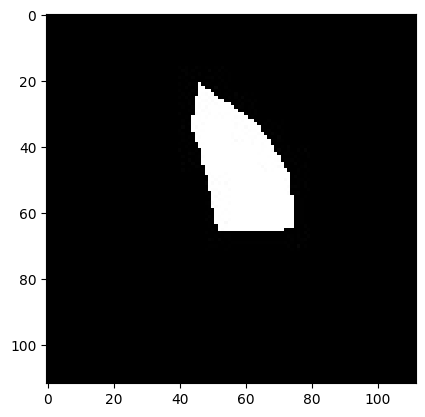

In [ ]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from model import UNET
import matplotlib.pyplot as plt


import torchvision

from utils import (


    load_checkpoint,
    save_checkpoint,
    get_loaders,
    check_accuracy,
    save_predictions_as_imgs,
)

# Hyperparameters etc.
LEARNING_RATE = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 1
NUM_EPOCHS = 1
NUM_WORKERS = 8
IMAGE_HEIGHT = 112
IMAGE_WIDTH = 112 
PIN_MEMORY = True
LOAD_MODEL = False
TRAIN_IMG_DIR = "../data/train_images/"
TRAIN_MASK_DIR = "../data/train_masks/"
VAL_IMG_DIR = "../data/val_images/"
VAL_MASK_DIR = "../data/val_masks/"


def main():
    train_transform = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            # A.Rotate(limit=35, p=1.0),
            # A.HorizontalFlip(p=0.5),
            # A.VerticalFlip(p=0.1),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )

    val_transforms = A.Compose(
        [
            A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            ),
            ToTensorV2(),
        ],
    )

    model = UNET(in_channels=3, out_channels=1).to(DEVICE)
    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    train_loader, val_loader = get_loaders(
        TRAIN_IMG_DIR,
        TRAIN_MASK_DIR,
        VAL_IMG_DIR,
        VAL_MASK_DIR,
        BATCH_SIZE,
        train_transform,
        val_transforms,
        NUM_WORKERS,
        PIN_MEMORY,
    )

    from dataset import EchoDataset

    train_ds = EchoDataset(
        image_dir=TRAIN_IMG_DIR,
        mask_dir=TRAIN_MASK_DIR,
        transform=train_transform,
    )

    image, label = train_ds[0]
    print(image.shape, label.shape)


    image, label = train_ds[0]
    print(f"Image shape: {image.shape}")
    plt.imshow(label,cmap="gray") # image shape is [1, 28, 28] (colour channels, height, width)
    #plt.title(label);



if __name__ == "__main__":
    main()

In [ ]:
path =  '../data/train_masks/0X1A0A263B22CCD966_72.jpg'
img= cv2.imread(path)

normalizacion = A.Compose(
        [
            A.Normalize(
                mean=[0.0, 0.0, 0.0],
                std=[1.0, 1.0, 1.0],
                max_pixel_value=255.0,
            )        ],
    )

img_normalizada = normalizacion(image = img)['image']

cv2.imwrite('normalized.jpg', img_normalizada)
imagen1 = cv2.imread('./normalized.jpg')

cv2.imshow("mask",imagen1)



cv2.waitKey(0)
cv2.destroyWindow()


